Datos: del 15jun/sabado - 29jun/sabado. 
Series de tiempo de invocaciones dias,
se hara de un dia, primero sin funciones timer 
luego con funciones timer
y se im plementará una funcion  para manipular los minutos en que inician las funciones timer 

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
from tqdm import tqdm
import math


In [96]:
dia = pd.read_csv("invocations_per_function_md.anon.d05.csv")

In [3]:
# coeficiente de variacion 
cv = lambda x: np.std(x, ddof = 1) / np.mean(x) #zz* 100

In [5]:
cond = dia.loc[dia['Trigger'] == "timer"].index # condicicon para eliminar timer 
dia_no_timer= dia.drop(cond).reset_index(drop = True) # False porque no se puede reset index directo  
dia_no_timer.drop(['HashOwner', 'HashApp', 'Trigger', 'HashFunction'], axis = 1, inplace = True)
#dia_no_timer.set_index('HashFunction',inplace=True) # para 

In [6]:
dia_no_timer.sum()

1       621704
2       643333
3       607253
4       603751
5       603359
         ...  
1436    508238
1437    500552
1438    480372
1439    499981
1440    506970
Length: 1440, dtype: int64

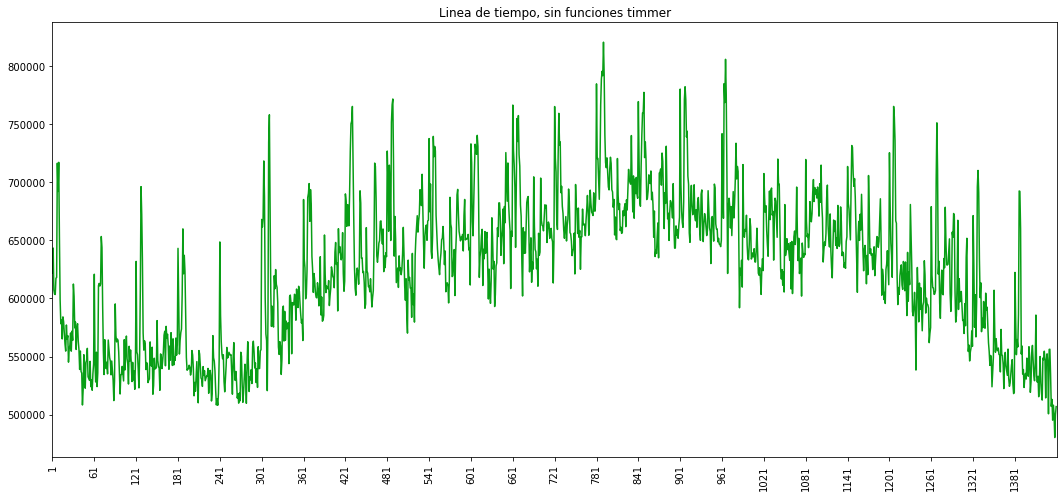

In [7]:
plt.figure(figsize=(18,8))
plt.plot(dia_no_timer.sum(), color ='#099e16')

plt.xlim(0, 1440)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("Linea de tiempo, sin funciones timmer")
plt.ion()


In [111]:
dia_todos = dia.drop(['HashOwner', 'HashApp', 'Trigger'], axis = 1)
dia_todos= dia_todos.reset_index(drop = True)  
dia_todos.set_index('HashFunction',inplace=True)

In [122]:
dia_todos

,1,2,3,4,5,6,7,8,9,10,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
HashFunction,,,,,,,,,,,,,,,,,,,,,
520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96b3d7f85d46209b7872,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66e9a975e427f25fc7ed,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
fa4f840d0cddc391a9afee2b15074f7f92bec15e7ea91641fa075ccee3be3068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed86ae062344eb0cb7c2e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
740c5c767e4b9978ee59a97d1829cfbaf755a47806a3114f0d4c182bb5a7e253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d01feeef6c6a03ba8cc96dbfdcb8898106b18acbe9d100185182b218072e0e8b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d43df62e0448cf994831aba36a262443378c03993bbb7b9570dfa86c9ba9f8da,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f1ff5a83374938d5da346b909ae4c6aaf6488f575116c9936860ae86ebb9e0d6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


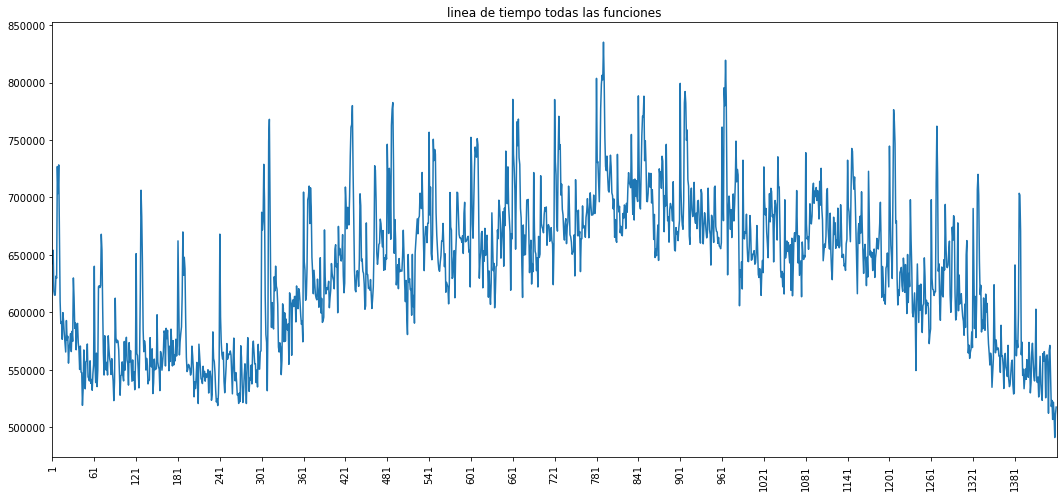

In [80]:
plt.figure(figsize=(18,8))
plt.plot(dia_todos.sum())

plt.xlim(0, 1440)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("linea de tiempo todas las funciones")
plt.ion()


In [11]:
cond = dia.loc[dia['Trigger'] != "timer"].index # condicicon para eliminar timer 
dia_timer= dia.drop(cond).reset_index(drop = True) # False porque no se puede reset index directo  
dia_timer.drop(['HashOwner', 'HashApp', 'Trigger', 'HashFunction'], axis = 1, inplace = True)
#dia_no_timer.set_index('HashFunction',inplace=True) # para 


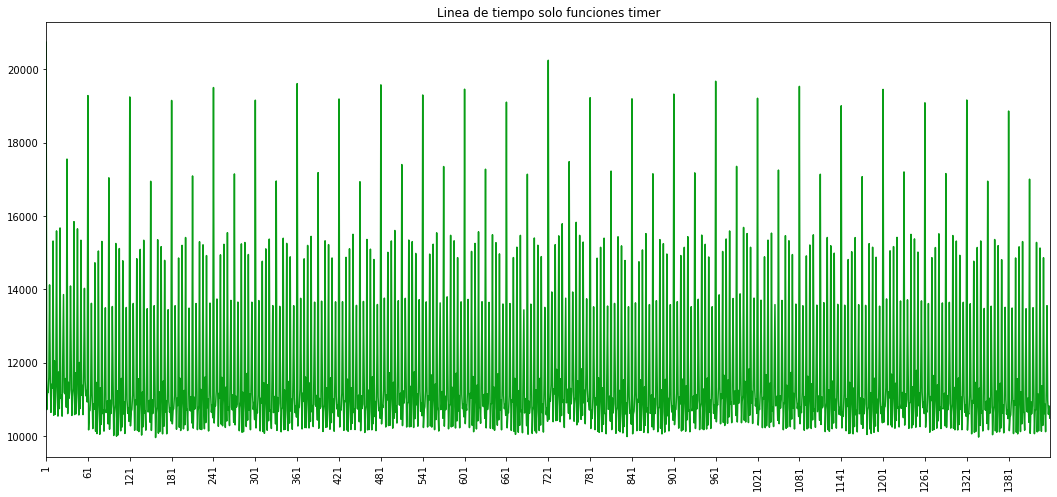

In [12]:
plt.figure(figsize=(18,8))
plt.plot(dia_timer.sum(), color ='#099e16')

plt.xlim(0, 1440)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("Linea de tiempo solo funciones timer")
plt.ion()

In [13]:
print("Coeficiente de variacion sin funciones timer:", cv(dia_no_timer.sum()))
print("Coeficiente de variacion todas las funciones:", cv(dia_todos.sum()))
print("Coeficiente de variacion solo funciones timmer:", cv(dia_timer.sum()))

Coeficiente de variacion sin funciones timer: 0.09902839915134365
Coeficiente de variacion todas las funciones: 0.09769711276117798
Coeficiente de variacion solo funciones timmer: 0.16755999797213697


#******solo practica******
print(type(dia_timer.sum().to_numpy()))
print(dia_timer.sum().to_numpy())
a= 5
print(dia_timer.sum().to_numpy()[:a])
#***************

aqui algoritmo para manipular funciones timmer

In [14]:
#usar aparicion.csv que trae de todas las funciones timer hashfuntion, periodo de invocacion, 1era aparicicon en min
aparicion_func= pd.read_csv('aparicion.csv')
aparicion_func.set_index('HashFunction',inplace=True)
aparicion_func

,periodo,1ra_aparicion
HashFunction,,
000f2da683015ed9906123feadcb750a58335a0fb8eaa08eee4146445240dc1a,30.0,1.0
00174b212af53df7f8b757f224ca03623d7469947141937615e628de3e8a1770,4.0,1.0
002d6666d5086611a8ea111dc5bcca2978ee5f2b08da82deef579d5ed8765979,9.0,1.0
002f14a3c86f140f60aacb99dde244ca728a5adef2a1a256d7b273c6adee332f,1440.0,121.0
003113d23daef08fb19592d506530f9929614aca4520830fd9b35e77fb8f4f79,5.0,1.0
...,...,...
fff15d76bbbd02d0f6f7994f5b01767453a3f32a9888c29f87874626050f92e0,1440.0,361.0
fff53d223baae383544a75e971c297c13d99b24781efd955ccc08fc3b63885f7,15.0,1.0
fff53d9ddaca0baefc44f74794bd32dc029076dc025e296e809ccbe69fc919e6,3.0,1.0


In [4]:
# funcion para buscar id de funciones con periodo y minuto de inicio especifico
# periodo, cada cuanto se ejecuta la funcion en minutos, 1, 60, 120, 180, 1440
# minuto en el se incia las llamadas a las funciones

def buscar_Id_func(periodo, inic):
    aparicion_func= pd.read_csv('aparicion.csv') #csv con los id de funciones, periodo de invocacion y munito de 1ra aparacion
    aparicion_func.set_index('HashFunction',inplace=True)
    result= aparicion_func[(aparicion_func['periodo']==periodo) & (aparicion_func['1ra_aparicion'] == inic)]
    return result.index.to_numpy()
    

In [5]:
# lista, es la lista de Id,HashFunction de las funciones que se va a modificar
# n, numero de funciones a modificar
# s, parametros de cuantos minutos se desea mover o desfazar la funciones 
# pos, 0 o 1 posicion a donde se mueve la funcion, 0 hacia la izquierda 1 hacia la derecha 
#pos por defecto es 0, mover a la izquierda
def modificar_funciones(lista, s, n=-1, pos=0):
    if(len(lista) == 0):
        return
    if(pos > 1 or pos < 0):
        print("parametro invalido")
        return 
    if(n != -1):
        cont = n
        adi = np.zeros(s, dtype=int)
        for l in lista:
            if(l in dia_todos.index):
                temp = dia_todos.loc[l, :].to_numpy()
                aux = np.concatenate((temp, adi))
                dia_todos.loc[l, :] = aux[:1440]
                cont-=1
            if (cont == 0):
                return 
    elif(pos==1):
        adi = np.zeros(s, dtype=int)
        for l in lista:
            if(l in dia_todos.index):
                temp = dia_todos.loc[l, :].to_numpy()
                aux = np.concatenate((adi, temp))
                dia_todos.loc[l, :] = aux[:1440]
    else:
        adi = np.zeros(s, dtype=int)
        for l in lista:
            if(l in dia_todos.index):
                temp = dia_todos.loc[l, :].to_numpy()
                aux = np.concatenate((adi, temp))
                dia_todos.loc[l, :] = aux[:1440]
    return  

In [6]:
#funcion que mueve funcion de acuerdo a su perido, 
# funciones con periodo 5min, analiza los 5 primeros minutos, y mueve la funcionesa al
# minuto con menos carga dentro de su rango 

# p, periodo
def mod_func_menos_car(p):
    arr_p = dia_todos.sum().to_numpy()[:p]
    pos_min = np.where(arr_p == np.amin(arr_p))[0] #indice de menor, de 0 a p-1
    mun_min = (pos_min+1)
    for minu in range(1, p+1):
        l_aux = buscar_Id_func(p, minu)
        if((minu-mun_min) <= 0):
            modificar_funciones(l_aux, abs(minu-mun_min))
        elif((minu-mun_min) > 0):
            modificar_funciones(l_aux, abs(minu-mun_min), -1, 1)
    return  

#******* codigo prueba *******
arr_p = dia_todos.sum().to_numpy()[:5]
pos_min = np.where(arr_p == np.amin(arr_p))[0]#indice de menor, de 0 a p-1
print(arr_p)
print(pos_min)
#********************
#####ejemplo de cambiar funciones con parametros dados
ids= buscar_Id_func(1440, 1)
modificar_funciones(ids, 200, 3)
len(ids)
################

# se experimenta con la funcion que modifica funciones con menos carga

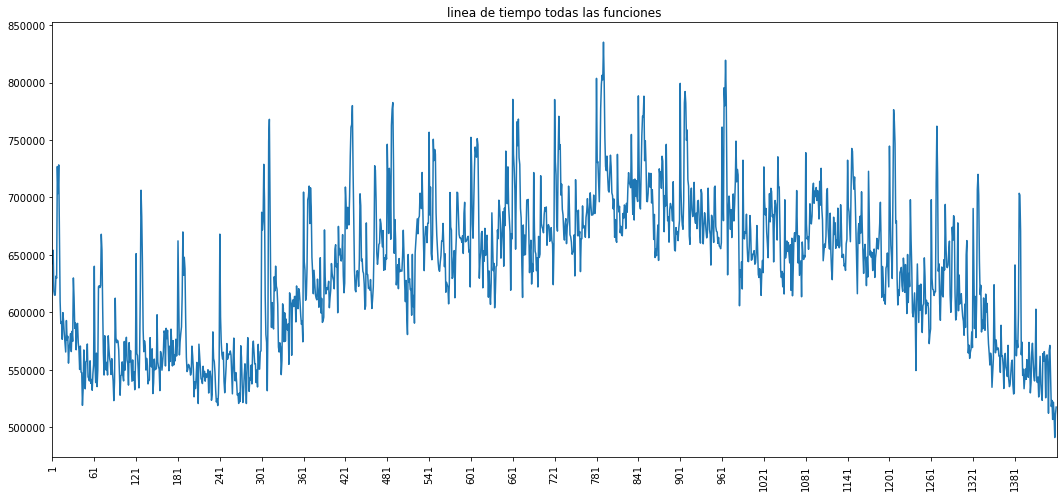

In [21]:
plt.figure(figsize=(18,8))
plt.plot(dia_todos.sum())

plt.xlim(0, 1440)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("linea de tiempo todas las funciones")
plt.ion()

In [22]:
print("Coeficiente de variacion:", cv(dia_todos.sum()))

Coeficiente de variacion: 0.09769711276117798


In [23]:
#se modifica funciones con menos cargar en los primeros 5 minutos 
mod_func_menos_car(5)

Coeficiente de variacion: 0.0974562921939484


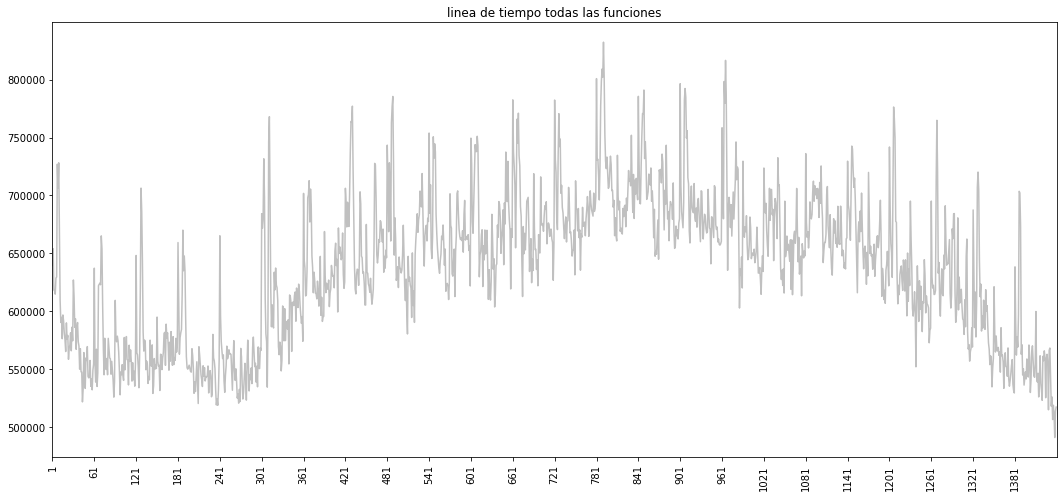

In [25]:
plt.figure(figsize=(18,8))
plt.plot(dia_todos.sum(), color ='#C0C0C0')

plt.xlim(0, 1440)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("linea de tiempo todas las funciones")
plt.ion()
print("Coeficiente de variacion:", cv(dia_todos.sum()))

# ------------------------------------------------------------------------------------------

# se experimenta con funciones con cualquier periodo  y desv_est <= 1

In [28]:
#se carga el csv Periodos_All generado en el cuaderno Patrones de invocaciones con tipo de funciones.ipynbfun
fun_perd_all = pd.read_csv("Periodos_All.csv")
fun_perd_all

,HashFunction,Trigger,periodo,Desv_Est
0,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,5.0,0.00
1,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,5.0,0.01
2,93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed8...,orchestration,1440.0,510.93
3,740c5c767e4b9978ee59a97d1829cfbaf755a47806a311...,http,1440.0,546.03
4,c108b4864b866b38b80d0e4594cc6d038f39668b804a1b...,http,1440.0,508.89
...,...,...,...,...
74342,4795a4eddf26cca87a5c7c1de760fc1beefd16f866c197...,http,1440.0,NaN
74343,75e947006f189b6cce5c6516975142f29a0f169e764fde...,storage,85.0,NaN
74344,11b3d8753f8f707b77c23063fb9cc9cfe9c74b40f9ab8c...,storage,1440.0,NaN
74345,42212390028151a3ab9918fd440633957a4b3b8bd3e679...,storage,1440.0,NaN


In [20]:
fun_perd_all['periodo'].unique()
len(fun_perd_all['periodo'].unique())

4678

In [21]:
lista = []
for i in fun_perd_all.groupby('periodo').count().index: 
    lista.append((i, fun_perd_all.groupby('periodo').count()['HashFunction'][i]))
print(lista)
print()
print(len(lista))
    

In [22]:
print(lista)
print()
print(len(lista))

[(1.0, 8533), (1.01, 295), (1.02, 129), (1.03, 76), (1.04, 55), (1.05, 68), (1.06, 67), (1.07, 72), (1.08, 49), (1.09, 58), (1.1, 58), (1.11, 47), (1.12, 61), (1.13, 33), (1.14, 58), (1.15, 53), (1.16, 54), (1.17, 90), (1.18, 78), (1.19, 59), (1.2, 98), (1.21, 58), (1.22, 67), (1.23, 73), (1.24, 80), (1.25, 204), (1.26, 78), (1.27, 59), (1.28, 72), (1.29, 88), (1.3, 80), (1.31, 57), (1.32, 42), (1.33, 156), (1.34, 23), (1.35, 22), (1.36, 35), (1.37, 27), (1.38, 24), (1.39, 21), (1.4, 60), (1.41, 23), (1.42, 19), (1.43, 60), (1.44, 37), (1.45, 19), (1.46, 24), (1.47, 22), (1.48, 23), (1.49, 24), (1.5, 324), (1.51, 23), (1.52, 16), (1.53, 20), (1.54, 20), (1.55, 25), (1.56, 28), (1.57, 32), (1.58, 28), (1.59, 20), (1.6, 32), (1.61, 12), (1.62, 33), (1.63, 15), (1.64, 26), (1.65, 20), (1.66, 30), (1.67, 175), (1.68, 22), (1.69, 26), (1.7, 16), (1.71, 32), (1.72, 26), (1.73, 24), (1.74, 12), (1.75, 66), (1.76, 16), (1.77, 14), (1.78, 13), (1.79, 19), (1.8, 31), (1.81, 18), (1.82, 20), (1.8

In [29]:
countt = fun_perd_all[fun_perd_all['Desv_Est']<=1].reset_index(drop=True)
lista = []
for i in countt.groupby('periodo').count().index: 
    lista.append((i, countt.groupby('periodo').count()['HashFunction'][i]))
print(lista)
print()
print(len(lista))
    

[(1.0, 3793), (1.01, 195), (1.02, 86), (1.03, 46), (1.04, 28), (1.05, 53), (1.06, 42), (1.07, 46), (1.08, 27), (1.09, 44), (1.1, 39), (1.11, 33), (1.12, 31), (1.13, 26), (1.14, 34), (1.15, 35), (1.16, 37), (1.17, 48), (1.18, 56), (1.19, 47), (1.2, 58), (1.21, 43), (1.22, 54), (1.23, 53), (1.24, 63), (1.25, 123), (1.26, 65), (1.27, 49), (1.28, 51), (1.29, 68), (1.3, 62), (1.31, 42), (1.32, 29), (1.33, 33), (1.34, 13), (1.35, 17), (1.36, 12), (1.37, 19), (1.38, 7), (1.39, 12), (1.4, 21), (1.41, 13), (1.42, 9), (1.43, 29), (1.44, 11), (1.45, 6), (1.46, 8), (1.47, 9), (1.48, 13), (1.49, 15), (1.5, 37), (1.51, 14), (1.52, 6), (1.53, 5), (1.54, 15), (1.55, 10), (1.56, 10), (1.57, 11), (1.58, 16), (1.59, 12), (1.6, 7), (1.61, 3), (1.62, 14), (1.63, 5), (1.64, 13), (1.65, 12), (1.66, 18), (1.67, 85), (1.68, 10), (1.69, 17), (1.7, 8), (1.71, 5), (1.72, 10), (1.73, 3), (1.74, 6), (1.75, 9), (1.76, 4), (1.77, 5), (1.78, 3), (1.79, 10), (1.8, 9), (1.81, 3), (1.82, 6), (1.83, 6), (1.84, 4), (1.85, 

In [66]:
countt = fun_perd_all[fun_perd_all['Desv_Est']<=1].reset_index(drop=True)
def clasif(x):
    dec, ent = math.modf(x)
    if(dec == 0):
        return x
    else:
        return 0 
       
countt["periodo"] = countt["periodo"].apply(clasif) 
countt = countt[countt['periodo']!=0].reset_index(drop=True)
countt

,HashFunction,Trigger,periodo,Desv_Est
0,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,5.0,0.00
1,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,5.0,0.01
2,b83b1aab2caeed6ea8fb204f414856fb2a8dd5a8856354...,http,5.0,0.01
3,0b4453d16b9c62e9562e0242aefb7757a5972a9f7481f0...,timer,5.0,0.00
4,5e3de8288370ea52d8cb318340279b11127ddaebc19179...,timer,15.0,0.00
...,...,...,...,...
23167,abff8afa714f752377a6347fb9baa73f7b927bf454602e...,timer,5.0,0.00
23168,193bfc197a953c984205ec8fc10099d095aa9d884a6cbd...,timer,1.0,0.00
23169,928728fe1d2ce443138dde00d46175283cf4385d7acb79...,http,1440.0,0.00
23170,8226480b0f5f95aae38aac204bf1e8b308112f9ede6b64...,timer,5.0,0.00


In [67]:
lista = []
for i in countt.groupby('periodo').count().index: 
    lista.append((i, countt.groupby('periodo').count()['HashFunction'][i]))
print(lista)
print()
print(len(lista))
    

[(1.0, 3793), (2.0, 523), (3.0, 973), (4.0, 409), (5.0, 3374), (6.0, 44), (7.0, 2), (8.0, 2), (9.0, 4), (10.0, 697), (11.0, 3), (12.0, 10), (13.0, 5), (14.0, 3), (15.0, 1010), (16.0, 2), (17.0, 3), (20.0, 109), (23.0, 1), (24.0, 1), (26.0, 2), (27.0, 1), (30.0, 523), (32.0, 1), (33.0, 1), (35.0, 1), (43.0, 1), (45.0, 4), (58.0, 2), (60.0, 1611), (65.0, 2), (69.0, 1), (71.0, 1), (80.0, 1), (90.0, 2), (92.0, 1), (96.0, 1), (111.0, 1), (115.0, 1), (120.0, 201), (137.0, 1), (160.0, 2), (165.0, 1), (170.0, 3), (178.0, 1), (180.0, 78), (192.0, 1), (193.0, 1), (195.0, 1), (198.0, 4), (200.0, 3), (210.0, 2), (240.0, 152), (241.0, 4), (270.0, 2), (285.0, 6), (300.0, 35), (330.0, 1), (360.0, 191), (365.0, 3), (400.0, 1), (420.0, 12), (450.0, 2), (475.0, 1), (480.0, 44), (510.0, 1), (540.0, 10), (600.0, 18), (659.0, 1), (660.0, 4), (688.0, 1), (720.0, 342), (721.0, 3), (900.0, 4), (960.0, 3), (1020.0, 8), (1056.0, 1), (1080.0, 1), (1183.0, 1), (1320.0, 1), (1438.0, 1), (1439.0, 1), (1440.0, 8892)

<AxesSubplot:xlabel='periodo'>

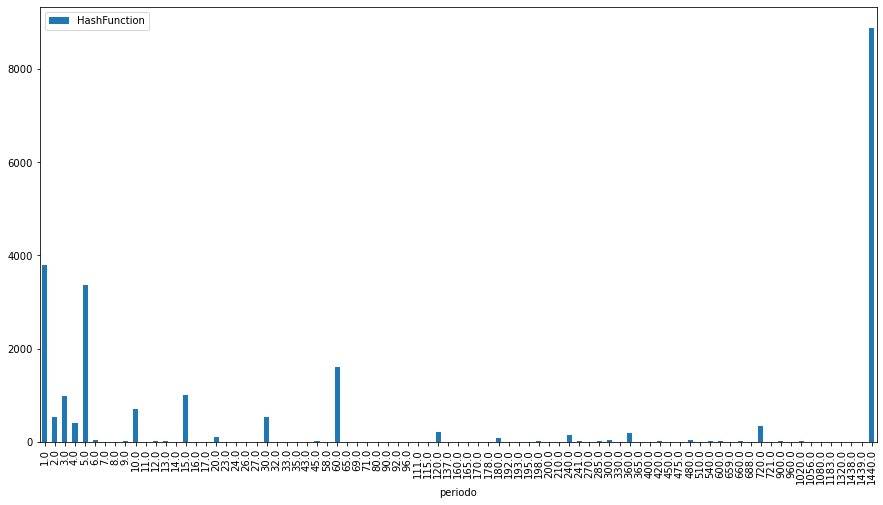

In [69]:
countt.groupby('periodo')[['HashFunction']].count().plot(kind='bar', figsize=[15,8])

         HashFunction
periodo              
1.0              3793
2.0               523
3.0               973
4.0               409
5.0              3374
6.0                44
10.0              697
12.0               10
15.0             1010
20.0              109
30.0              523
60.0             1611
120.0             201
180.0              78
240.0             152
300.0              35
360.0             191
420.0              12
480.0              44
540.0              10
600.0              18
720.0             342
1440.0           8892


<AxesSubplot:xlabel='periodo'>

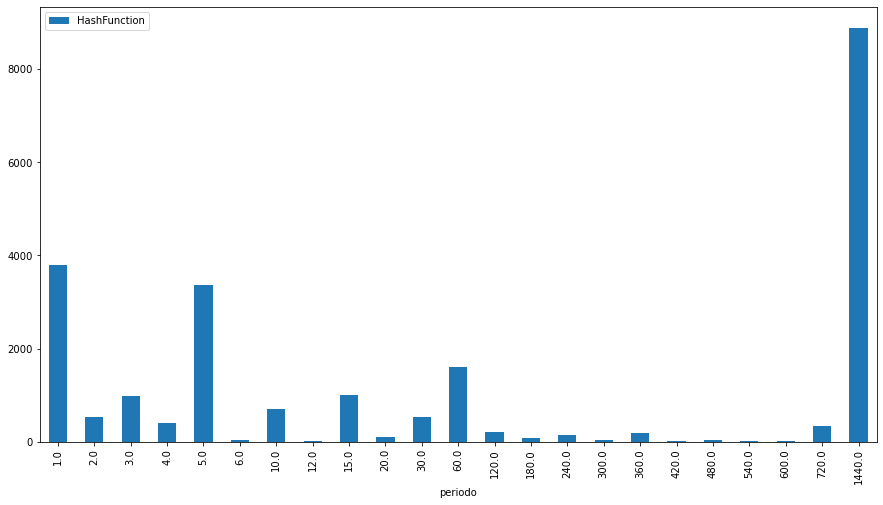

In [74]:
counts = countt['periodo'].value_counts()
res = countt[~countt['periodo'].isin(counts[counts < 10].index)]
print(res.groupby('periodo')[['HashFunction']].count())
res.groupby('periodo')[['HashFunction']].count().plot(kind='bar', figsize=[15,8])

               HashFunction
Trigger                    
event                   404
http                   3646
orchestration          1156
others                  688
queue                  1387
storage                 205
timer                 15565


<AxesSubplot:xlabel='Trigger'>

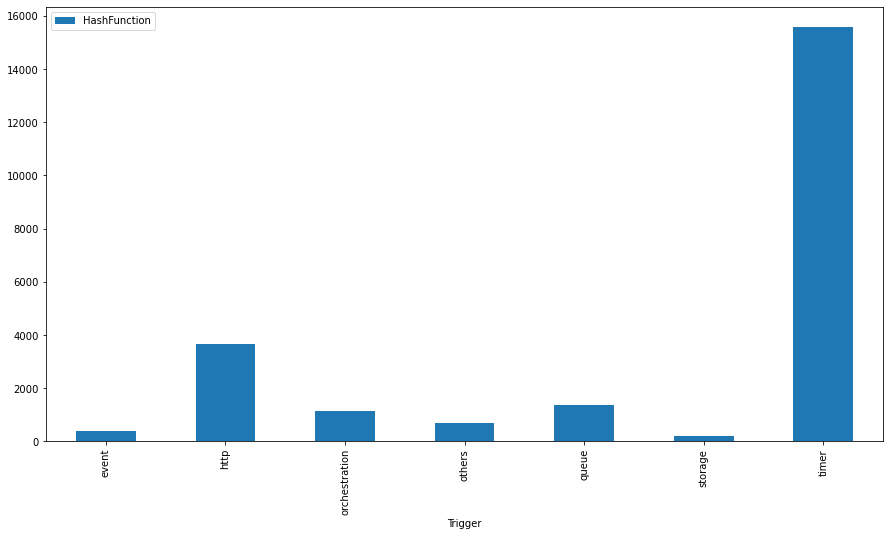

In [76]:
#número de funciones con cualquier periodo  y desv_est <= 1, por tipo de trigger
print(res.groupby('Trigger')[['HashFunction']].count())
res.groupby('Trigger')[['HashFunction']].count().plot(kind='bar', figsize=[15,8])

Coeficiente de variacion: 0.09769711276117798


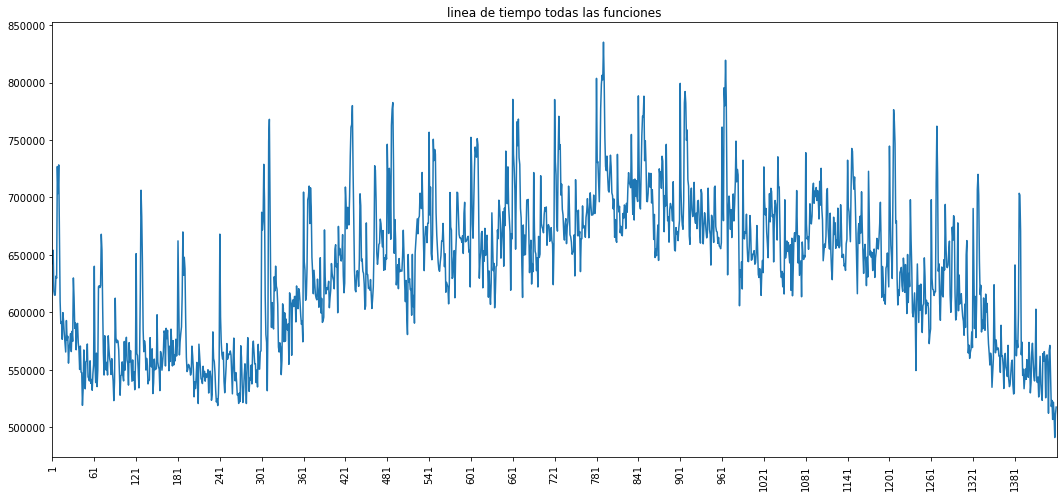

In [82]:
print("Coeficiente de variacion:", cv(dia_todos.sum()))
plt.figure(figsize=(18,8))
plt.plot(dia_todos.sum())

plt.xlim(0, 1440)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("linea de tiempo todas las funciones")
plt.ion()


In [102]:
#quitandole todas las funciones con con cualquier periodo  y desv_est <= 1
indic = countt.set_index('HashFunction')
indic = indic.index.to_numpy()
with tqdm(total=len(indic), file=sys.stdout) as pbar:
    cont_ind = 0
    for i in indd:
        if(i in dia_todos.index):
            dia_todos.drop(i, inplace = True)
        cont_ind+=1    
        pbar.set_description('indices procesados: %d' %(cont_ind))
        pbar.update(1)
print("Coeficiente de variacion:", cv(dia_todos.sum()))
plt.figure(figsize=(18,8))
plt.plot(dia_todos.sum())

plt.xlim(0, 1440)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("linea de tiempo todas las funciones")
plt.ion()


indices procesados: 2406:  10%|█████                                            | 2406/23172 [07:43<1:06:37,  5.20it/s]


KeyboardInterrupt: 

Coeficiente de variacion: 0.35420205613517064


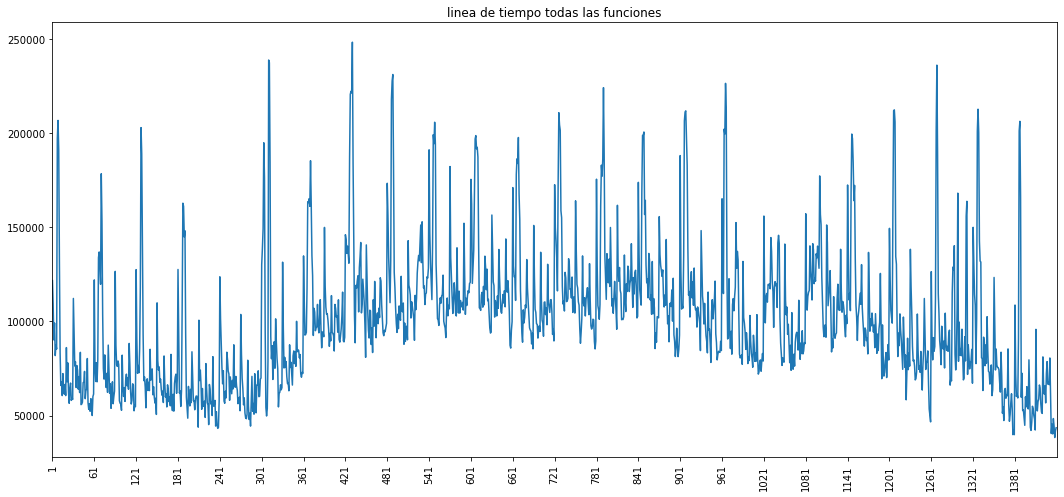

In [131]:
#quitandole todas las funciones con con cualquier periodo  y desv_est <= 1
indic = countt.set_index('HashFunction')
indic = indic.index.to_numpy()
#dia_m = dia_todos.drop(dia_todos[dia_todos['HashFunction'].isin(indic)].index)
dia_m = dia_todos[~dia_todos.index.isin(indic)]


print("Coeficiente de variacion:", cv(dia_m.sum()))
plt.figure(figsize=(18,8))
plt.plot(dia_m.sum())

plt.xlim(0, 1440)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("linea de tiempo todas las funciones")
plt.ion()

In [132]:
dia_m

,1,2,3,4,5,6,7,8,9,10,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
HashFunction,,,,,,,,,,,,,,,,,,,,,
fa4f840d0cddc391a9afee2b15074f7f92bec15e7ea91641fa075ccee3be3068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed86ae062344eb0cb7c2e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
740c5c767e4b9978ee59a97d1829cfbaf755a47806a3114f0d4c182bb5a7e253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c108b4864b866b38b80d0e4594cc6d038f39668b804a1ba88d2b95d682a8ab20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e4750c990ae62c562798f2556ffb69dc24f7a7e4e685fcba05824f8885bdd604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91854fa09d91670359095e08e316570bed625760b726bcd9a29fd661da5aa70b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
03ef401b7c1a22428af5d53bc5997313d5c1e7354365ceed1b9de7b2453035d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2db4f426c825ee67b3a00aad77719a59cb6a01cf74c78c62ebc42a72688df095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
print(dia_todos.index.isin(indic))
print(dia_todos[~dia_todos.index.isin(indic)])

[ True  True False ...  True False  True]
                                                    1  2  3  4  5  6  7  8  9  \
HashFunction                                                                    
fa4f840d0cddc391a9afee2b15074f7f92bec15e7ea9164...  0  0  0  0  0  0  0  0  0   
93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed86...  0  0  0  0  0  0  0  0  0   
740c5c767e4b9978ee59a97d1829cfbaf755a47806a3114...  0  0  0  0  0  0  0  0  0   
c108b4864b866b38b80d0e4594cc6d038f39668b804a1ba...  0  0  0  0  0  0  0  0  0   
e4750c990ae62c562798f2556ffb69dc24f7a7e4e685fcb...  0  0  0  0  0  0  0  0  0   
...                                                .. .. .. .. .. .. .. .. ..   
91854fa09d91670359095e08e316570bed625760b726bcd...  0  0  0  0  0  0  0  0  0   
03ef401b7c1a22428af5d53bc5997313d5c1e7354365cee...  0  0  0  0  0  0  0  0  0   
2db4f426c825ee67b3a00aad77719a59cb6a01cf74c78c6...  0  0  0  0  0  0  0  0  0   
d43df62e0448cf994831aba36a262443378c03993bbb7b9...  0  0  0  0  0  

In [107]:
print(dia_todos[dia_todos['HashFunction'].isin(indic)])
print(len(dia_todos[dia_todos['HashFunction'].isin(indic)]))

Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]
Index: []

[0 rows x 1441 columns]
0


In [23]:
import math
numero = 1.21
parte_decimal, parte_entera = math.modf(numero)
print("Su parte entera es {} y su parte decimal es {}".format(
    parte_entera, parte_decimal))
print(numero%parte_entera == 0)
print(parte_decimal == 0)

Su parte entera es 1.0 y su parte decimal es 0.0
True
True


In [31]:
print(fun_perd_all.dropna())


                                            HashFunction        Trigger  \
0      520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...           http   
1      115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...           http   
2      93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed8...  orchestration   
3      740c5c767e4b9978ee59a97d1829cfbaf755a47806a311...           http   
4      c108b4864b866b38b80d0e4594cc6d038f39668b804a1b...           http   
...                                                  ...            ...   
73914  cbd3427b2a6887a18e6d9191cb40812ecef3472f44234d...          timer   
73915  9c8349b7cdce8cd04f20907361b98f40bc48f7cf9831c9...           http   
73916  d6aa9971da3f1908cc0e23e5ad271d491e7f4bb455ee45...           http   
73917  4f2b3d43ebd38a84fec3ca9919e01223ab53796634ca3c...           http   
73920  93f0010b73fea32b504c7ad7e8373e51ef853aca468d18...          event   

       periodo  Desv_Est  
0         5.00      0.00  
1         5.00      0.01  
2      1440.00    

In [ ]:
######## codigo prueba para algoritmo ######

In [ ]:
print(dia.loc['d6a50fa610274244b42a39dcb31f28a699dc289ce5e7827fca931798074f3f63',:].to_numpy())
len(dia.loc['d6a50fa610274244b42a39dcb31f28a699dc289ce5e7827fca931798074f3f63',:].to_numpy())

In [ ]:
#print(aparicion_func.iloc["002f14a3c86f140f60aacb99dde244ca728a5adef2a1a256d7b273c6adee332f"])
print(aparicion_func.loc['002f14a3c86f140f60aacb99dde244ca728a5adef2a1a256d7b273c6adee332f', :])
#type(aparicion_func.loc['fff15d76bbbd02d0f6f7994f5b01767453a3f32a9888c29f87874626050f92e0', :])
print('g' in aparicion_func.index)


In [ ]:
#recuperar indices de funciones con un periodo requerido 
result= aparicion_func[(aparicion_func['periodo']==1440) & (aparicion_func['1ra_aparicion'] == 1)]
print(result.index.to_numpy())
type(result.index.to_numpy())

In [ ]:
'''dia.set_index('HashFunction',inplace=True) # para hacer sencillo el reemplazo de # de invocaciones por minuto 
dia.drop(['HashOwner', 'HashApp', 'Trigger'], axis = 1, inplace= True)
dia '''

In [64]:
d = {'Gender': ['F','F','F','F','M'], 
    'Age': ['0-17','0-17','0-17','0-17','+55'],
     'Purchase': [8370, 15200, 1422, 1057, 7969],
     'Marital_status': [0,0,0,0,0]
    }
df = pd.DataFrame(data=d)
df

,Gender,Age,Purchase,Marital_status
0,F,0-17,8370,0
1,F,0-17,15200,0
2,F,0-17,1422,0
3,F,0-17,1057,0
4,M,+55,7969,0


In [104]:
df.loc[4,:].tolist()
a=['O', '100', 154, 5, 54]
df.loc[4,:] = a[:4]#['O', '100', 154, 1]
b=[2,5,1,4,7]
adi = np.zeros(4, dtype = int)


In [109]:
arr = np.concatenate((adi, b))

print(arr)

[0 0 0 0 2 5 1 4 7]
